In [2]:
from helper_funcs import *
import os
os.chdir(r"C:\Users\setht\Dropbox\Citadel\GitHub\phase-coherence")

In [3]:
%load_ext autoreload
%autoreload
import matplotlib.pyplot as plt
import phaseco as pc


In [4]:
# Folders
paper_figures_folder = os.path.join('paper_analysis', 'results', 'paper_figures')
pkl_folder = os.path.join('paper_analysis', 'pickles', 'soae')
tau_pkl_folder = os.path.join('paper_analysis', 'pickles')
os.makedirs(paper_figures_folder, exist_ok=True)


In [5]:
# Colors
anole_color = "#07586E"
human_color = "#8C60B3"

# Fontsize / labels
fontsize = 34
labelpad = 20

In [6]:
"PARAMETERS"
# WF pre-processing parameters
# filter_meth = {
#     "type": "kaiser",
#     "cf": 300,
#     "df": 50,
#     "rip": 100,
# }  # High pass filter cutoff freq, transition band width, and max allowed ripple (in dB)
filter_meth=None
wf_len_s = 60  # Will crop waveform to this length (in seconds)
scale = True  # Scale the waveform (only actually scales if we know the right scaling constant, which is only Anoles and Humans)

# Coherence Parameters
hop_s = 0.01
win_type = "flattop"
rho=1.0
win_meth = {"method": "rho", "rho": rho, "win_type":win_type}
pw = False
bw = 50
xi_min_s = 0.001
delta_xi_s = 0.001
nfft = 2**14
const_N_pd = 0


# Start building LCC kwargs dict with constants
lcc_kwargs ={
        'wf_len_s':wf_len_s,
        'filter_meth':filter_meth,        
        'pw':pw,
        'xi_min_s':xi_min_s,
        'win_meth':win_meth,
        "nfft": nfft,
        "pkl_folder": pkl_folder,
}






Processing 'paper_analysis\pickles\soae\Human 1, PW=False, rho=1.0, Flattop, hop=441, tau=3285, filter=None, xi_max=1000ms, nfft=16384, N_pd=max, DM=True, wf_len=60s, wf=JIrearSOAEwf2 (Colossogram).pkl'


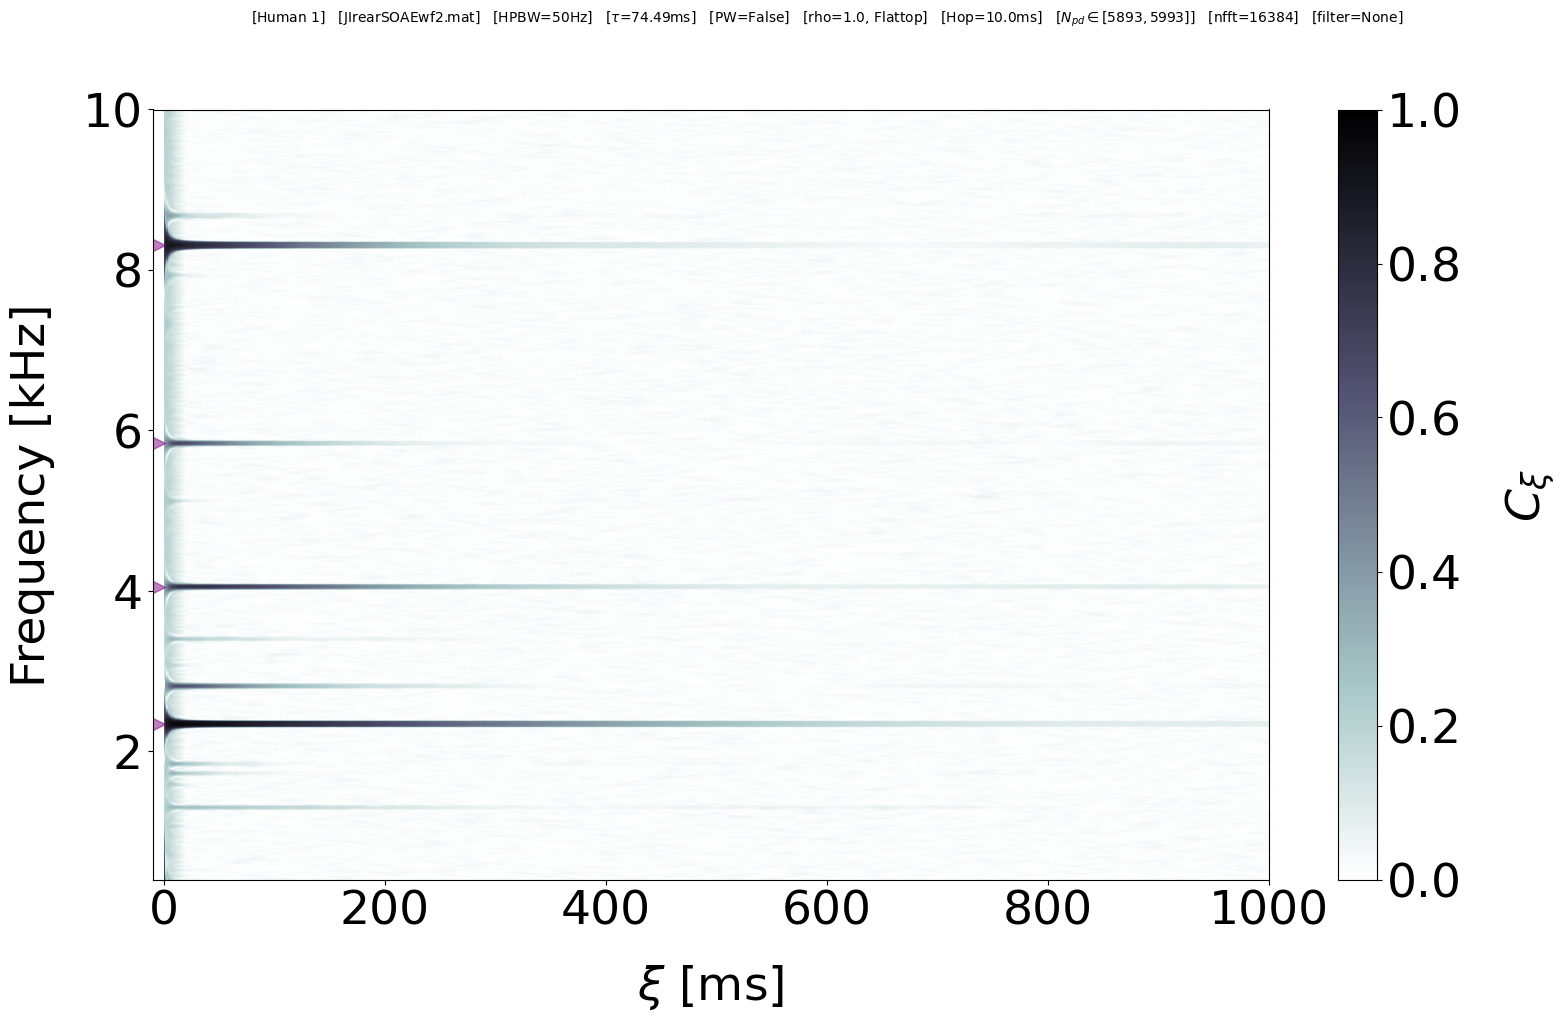

In [49]:
"Human Colossogram"

# Choose subject
species = "Human"
wf_idx = 1

# Get waveform
wf, wf_fn, fs, good_peak_freqs, bad_peak_freqs = get_wf(
    species=species,
    wf_idx=wf_idx,
)

# Get/set a few more params
xi_max_s = 1.0
tau = get_precalc_tau_from_bw(bw, fs, win_type, tau_pkl_folder)

# Load Colossogram
cgram_dict = load_calc_colossogram(
    **(
        lcc_kwargs
        | {
            "xi_max_s": xi_max_s,
            "species": species,
            "fs": fs,
            "tau": tau,
            "hop": int(round(hop_s * fs)),
            "wf": wf,
            "wf_idx": wf_idx,
            "wf_fn": wf_fn,
        }
    )
)


# Load everything that wasn't explicitly "saved" in the filename
colossogram = cgram_dict["colossogram"]
fn_id = cgram_dict["fn_id"]
win_meth_str = cgram_dict["win_meth_str"]
method_id = cgram_dict["method_id"]
filter_str = cgram_dict["filter_str"]
N_pd_str = pc.get_N_pd_str(const_N_pd, cgram_dict["N_pd_min"], cgram_dict["N_pd_max"])
f = cgram_dict["f"]
xis_s = cgram_dict["xis_s"]
good_peak_idxs = np.argmin(np.abs(f[:, None] - good_peak_freqs[None, :]), axis=0)
method_id = rf"[$\tau$={(tau/fs)*1000:.2f}ms]   [PW={pw}]   [{win_meth_str}]   [Hop={hop_s*1000:.1f}ms]   [{N_pd_str}]   [nfft={nfft}]"
suptitle = (
    rf"[{species} {wf_idx}]   [{wf_fn}]   [HPBW={bw}Hz]   {method_id}   [{filter_str}]"
)

# MAKE PLOT
plt.figure(figsize=(18, 10))
cbar = pc.plot_colossogram(xis_s, f, colossogram, cmap="bone_r", return_cbar=True)
# Set Chris' requested fontsizes
ax = plt.gca()


ax.set_xlabel(r"$\xi$ [ms]", labelpad=labelpad, fontsize=fontsize)
ax.set_ylabel("Frequency [kHz]", labelpad=labelpad, fontsize=fontsize)

ax.tick_params("both", labelsize=fontsize)
cbar.ax.yaxis.label.set_fontsize(fontsize)
cbar.ax.tick_params(labelsize=fontsize)

xmin = -10
xmax = 1000
plt.ylim(0.4, 10)
plt.xlim(-10, xmax)

for f0_idx in good_peak_idxs:
    plt.scatter(
        xmin / 2,
        f[f0_idx] / 1000,
        c="purple",
        marker=">",
        label="Peak at " + f"{f[f0_idx]:0f}Hz",
        alpha=0.5,
        s=100
    )

# plt.title(f"Colossogram", fontsize=18)
plt.suptitle(suptitle, fontsize=10)
# plt.tight_layout()
plt.savefig(
    os.path.join(paper_figures_folder, f"Human Colossogram ({wf_fn.split('.')[0]}).jpg"),
    dpi=500,
)

Processing 'paper_analysis\pickles\soae\Owl 3, PW=False, rho=1.0, Flattop, hop=441, tau=3285, filter=None, xi_max=100ms, nfft=16384, N_pd=max, DM=True, wf_len=60s, wf=owl_TAG4learSOAEwf1 (Colossogram).pkl'


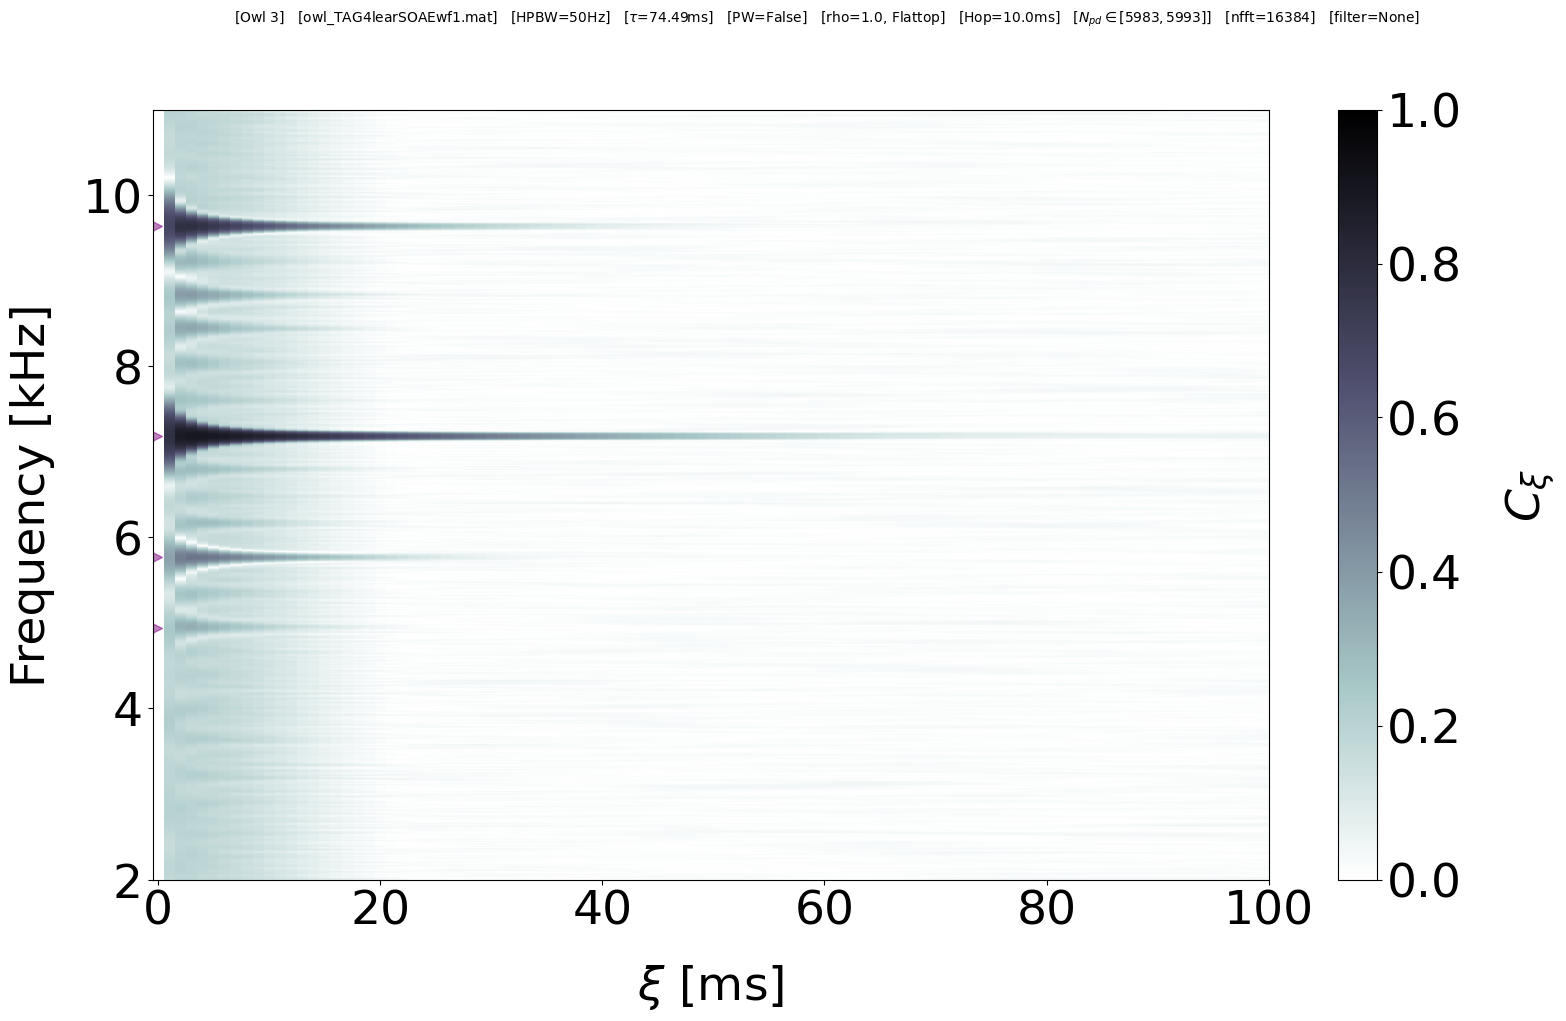

In [50]:
"Owl Colossogram"

# Choose subject
species = "Owl"
wf_idx = 3
# Get waveform
wf, wf_fn, fs, good_peak_freqs, bad_peak_freqs = get_wf(
    species=species,
    wf_idx=wf_idx,
)

# Get/set a few more params
xi_max_s = 0.1
tau = get_precalc_tau_from_bw(bw, fs, win_type, tau_pkl_folder)

# Load Colossogram
cgram_dict = load_calc_colossogram(
    **(
        lcc_kwargs
        | {
            "xi_max_s": xi_max_s,
            "species": species,
            "fs": fs,
            "tau": tau,
            "hop": int(round(hop_s * fs)),
            "wf": wf,
            "wf_idx": wf_idx,
            "wf_fn": wf_fn,
        }
    )
)


# Load everything that wasn't explicitly "saved" in the filename
colossogram = cgram_dict["colossogram"]
fn_id = cgram_dict["fn_id"]
win_meth_str = cgram_dict["win_meth_str"]
method_id = cgram_dict["method_id"]
filter_str = cgram_dict["filter_str"]
N_pd_str = pc.get_N_pd_str(const_N_pd, cgram_dict["N_pd_min"], cgram_dict["N_pd_max"])
f = cgram_dict["f"]
xis_s = cgram_dict["xis_s"]
good_peak_idxs = np.argmin(np.abs(f[:, None] - good_peak_freqs[None, :]), axis=0)
method_id = rf"[$\tau$={(tau/fs)*1000:.2f}ms]   [PW={pw}]   [{win_meth_str}]   [Hop={hop_s*1000:.1f}ms]   [{N_pd_str}]   [nfft={nfft}]"
suptitle = (
    rf"[{species} {wf_idx}]   [{wf_fn}]   [HPBW={bw}Hz]   {method_id}   [{filter_str}]"
)

# MAKE PLOT
plt.figure(figsize=(18, 10))
cbar = pc.plot_colossogram(
    xis_s,
    f,
    colossogram,
    cmap="bone_r",
    return_cbar=True
)
# Set Chris' requested fontsizes
ax = plt.gca()


ax.set_xlabel(r"$\xi$ [ms]", labelpad=labelpad, fontsize=fontsize)
ax.set_ylabel("Frequency [kHz]", labelpad=labelpad, fontsize=fontsize)

ax.tick_params('both', labelsize=fontsize)
cbar.ax.yaxis.label.set_fontsize(fontsize)
cbar.ax.tick_params(labelsize=fontsize)

plt.ylim(2, 11)
xmin=-0.5
plt.xlim(xmin, 100)

for f0_idx in good_peak_idxs:
    plt.scatter(
        xmin/2,
        f[f0_idx] / 1000,
        c="purple",
        marker=">",
        label="Peak at " + f"{f[f0_idx]:0f}Hz",
        alpha=0.5,
        s=100
    )
    
# plt.title(f"Colossogram", fontsize=18)
plt.suptitle(suptitle, fontsize=10)
# plt.tight_layout()
plt.savefig(os.path.join(paper_figures_folder, f'Owl Colossogram ({wf_fn.split('.')[0]}).jpg'),dpi=500)

Processing 'paper_analysis\pickles\soae\Anole 0, PW=False, rho=1.0, Flattop, hop=441, tau=3285, filter=None, xi_max=100ms, nfft=16384, N_pd=max, DM=True, wf_len=60s, wf=AC6rearSOAEwfB1 (Colossogram).pkl'


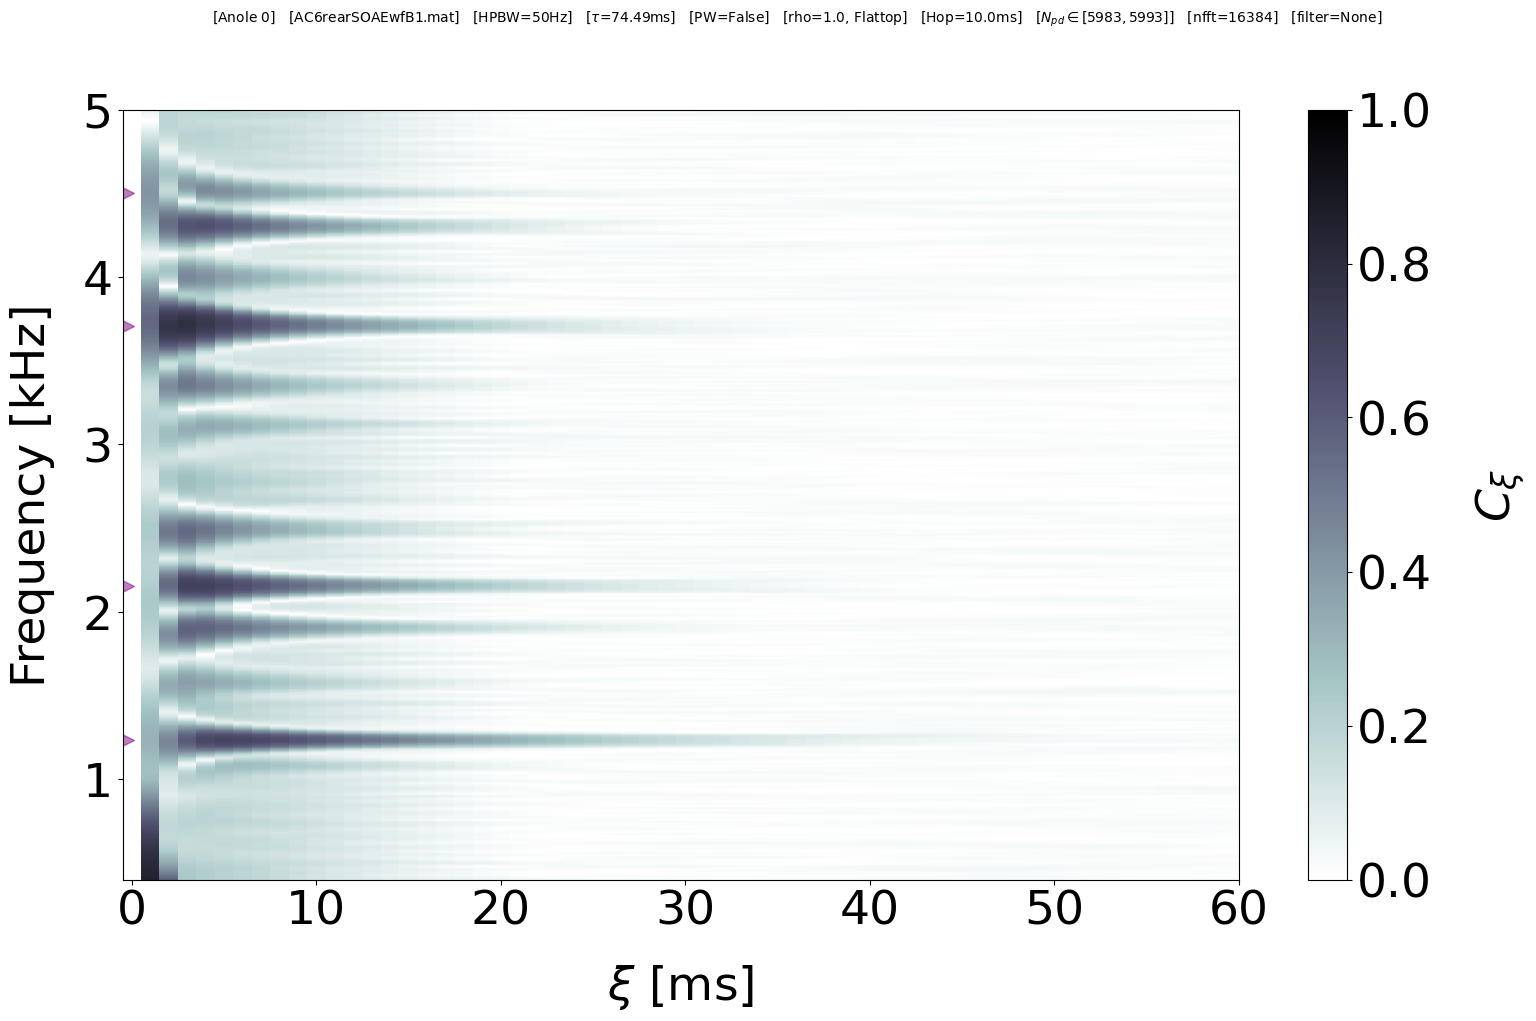

In [51]:
"Anole Colossogram"

# Choose subject
species = "Anole"
wf_idx = 0

# Get waveform
wf, wf_fn, fs, good_peak_freqs, bad_peak_freqs = get_wf(
    species=species,
    wf_idx=wf_idx,
)

# Get waveform
wf, wf_fn, fs, good_peak_freqs, bad_peak_freqs = get_wf(
    species=species,
    wf_idx=wf_idx,
)

# Get/set a few more params
xi_max_s = 0.1
tau = get_precalc_tau_from_bw(bw, fs, win_type, tau_pkl_folder)

# Load Colossogram
cgram_dict = load_calc_colossogram(
    **(
        lcc_kwargs
        | {
            "xi_max_s": xi_max_s,
            "species": species,
            "fs": fs,
            "tau": tau,
            "hop": int(round(hop_s * fs)),
            "wf": wf,
            "wf_idx": wf_idx,
            "wf_fn": wf_fn,
        }
    )
)


# Load everything that wasn't explicitly "saved" in the filename
colossogram = cgram_dict["colossogram"]
fn_id = cgram_dict["fn_id"]
win_meth_str = cgram_dict["win_meth_str"]
method_id = cgram_dict["method_id"]
filter_str = cgram_dict["filter_str"]
N_pd_str = pc.get_N_pd_str(const_N_pd, cgram_dict["N_pd_min"], cgram_dict["N_pd_max"])
f = cgram_dict["f"]
xis_s = cgram_dict["xis_s"]
good_peak_idxs = np.argmin(np.abs(f[:, None] - good_peak_freqs[None, :]), axis=0)
method_id = rf"[$\tau$={(tau/fs)*1000:.2f}ms]   [PW={pw}]   [{win_meth_str}]   [Hop={hop_s*1000:.1f}ms]   [{N_pd_str}]   [nfft={nfft}]"
suptitle = (
    rf"[{species} {wf_idx}]   [{wf_fn}]   [HPBW={bw}Hz]   {method_id}   [{filter_str}]"
)

# MAKE PLOT
plt.figure(figsize=(18, 10))
cbar = pc.plot_colossogram(
    xis_s,
    f,
    colossogram,
    cmap="bone_r",
    return_cbar=True
)
# Set Chris' requested fontsizes
ax = plt.gca()


ax.set_xlabel(r"$\xi$ [ms]", labelpad=labelpad, fontsize=fontsize)
ax.set_ylabel("Frequency [kHz]", labelpad=labelpad, fontsize=fontsize)

ax.tick_params('both', labelsize=fontsize)
cbar.ax.yaxis.label.set_fontsize(fontsize)
cbar.ax.tick_params(labelsize=fontsize)

plt.ylim(0.4, 5)
xmin=-0.5
plt.xlim(xmin, 60)

for f0_idx in good_peak_idxs:
    plt.scatter(
        xmin/2,
        f[f0_idx] / 1000,
        c="purple",
        marker=">",
        label="Peak at " + f"{f[f0_idx]:0f}Hz",
        alpha=0.5,
        s=100
    )
    
# plt.title(f"Colossogram", fontsize=18)
plt.suptitle(suptitle, fontsize=10)
# plt.tight_layout()
plt.savefig(os.path.join(paper_figures_folder, f'Anole Colossogram ({wf_fn.split('.')[0]}).jpg'),dpi=500)

Processing 'paper_analysis\pickles\soae\Anole 0, PW=False, rho=1.0, Flattop, hop=441, tau=3285, filter=None, xi_max=100ms, nfft=16384, N_pd=max, DM=True, wf_len=60s, wf=AC6rearSOAEwfB1 (Colossogram).pkl'
[FITTING 4500Hz AUTOCOHERENCE DECAY]
One peak found in first 26ms of xi, starting fit here
Fitting...
Fit succeeded on first try!


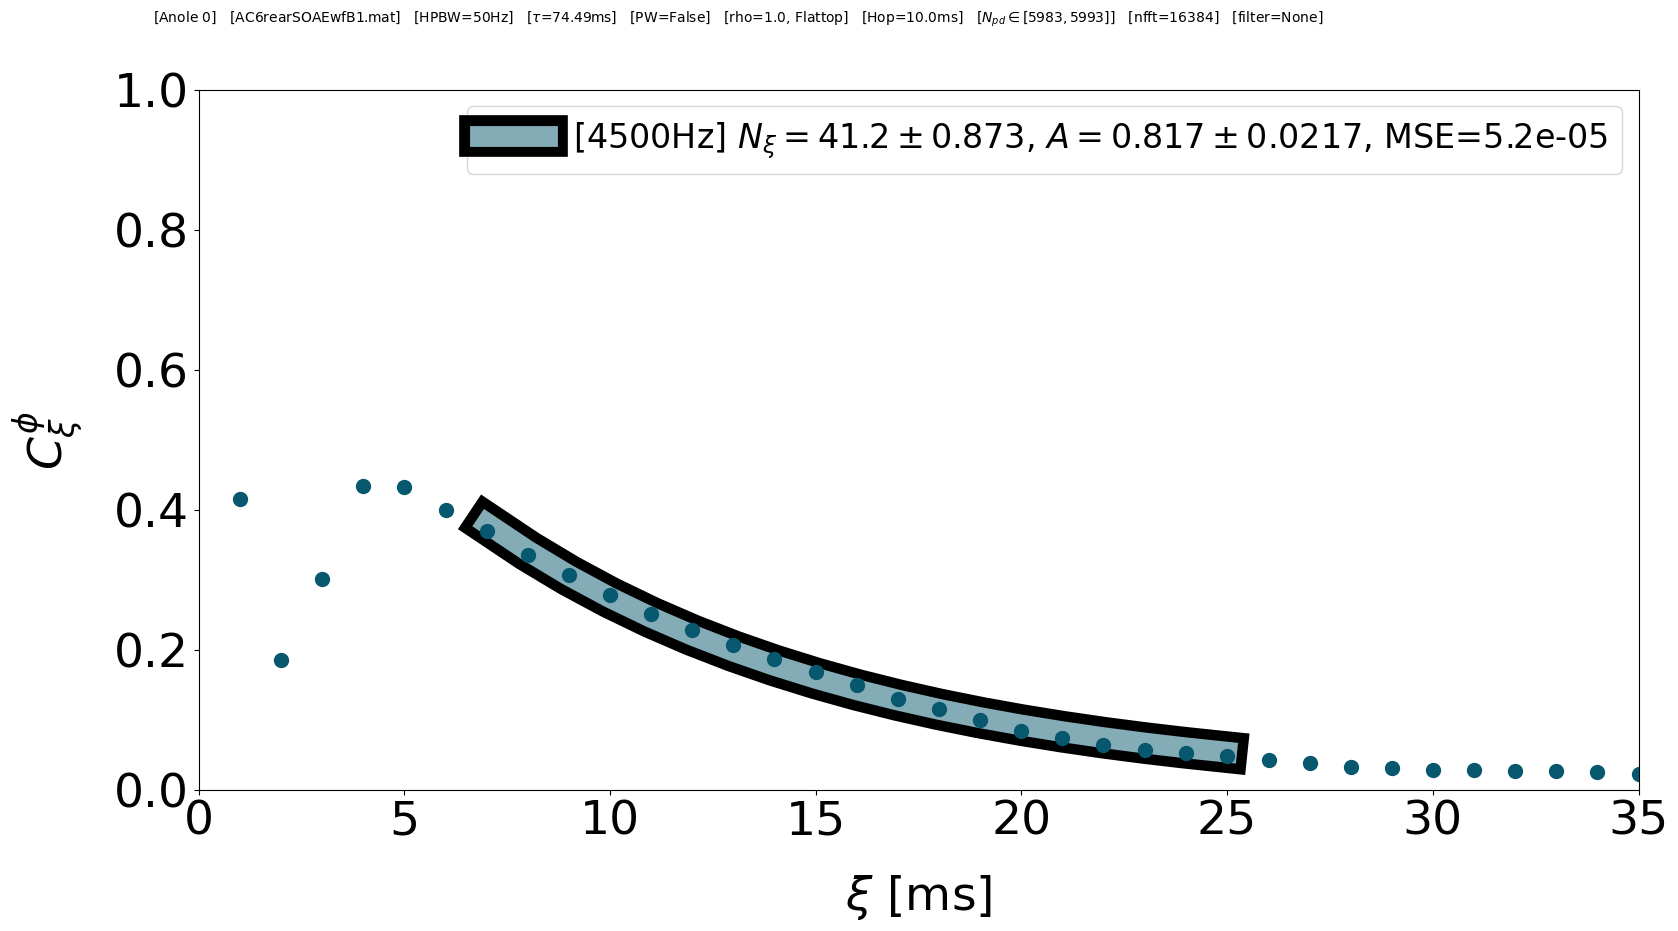

In [52]:
"Anole N_xi Fit"

# Choose subject
species = "Anole"
wf_idx = 0


# Get waveform
wf, wf_fn, fs, good_peak_freqs, bad_peak_freqs = get_wf(
    species=species,
    wf_idx=wf_idx,
)

# Get/set a few more params
xi_max_s = 0.1
tau = get_precalc_tau_from_bw(bw, fs, win_type, tau_pkl_folder)

# Load Colossogram
cgram_dict = load_calc_colossogram(
    **(
        lcc_kwargs
        | {
            "xi_max_s": xi_max_s,
            "species": species,
            "fs": fs,
            "tau": tau,
            "hop": int(round(hop_s * fs)),
            "wf": wf,
            "wf_idx": wf_idx,
            "wf_fn": wf_fn,
        }
    )
)


# Load everything that wasn't explicitly "saved" in the filename
colossogram = cgram_dict["colossogram"]
fn_id = cgram_dict["fn_id"]
win_meth_str = cgram_dict["win_meth_str"]
method_id = cgram_dict["method_id"]
filter_str = cgram_dict["filter_str"]
N_pd_str = pc.get_N_pd_str(const_N_pd, cgram_dict["N_pd_min"], cgram_dict["N_pd_max"])
f = cgram_dict["f"]
xis_s = cgram_dict["xis_s"]
good_peak_idxs = np.argmin(np.abs(f[:, None] - good_peak_freqs[None, :]), axis=0)
method_id = rf"[$\tau$={(tau/fs)*1000:.2f}ms]   [PW={pw}]   [{win_meth_str}]   [Hop={hop_s*1000:.1f}ms]   [{N_pd_str}]   [nfft={nfft}]"
suptitle = (
    rf"[{species} {wf_idx}]   [{wf_fn}]   [HPBW={bw}Hz]   {method_id}   [{filter_str}]"
)

# Get N_xi_fit
f0 = 4500

# Fitting Parameters
A_max = np.inf  # 1 or np.inf
A_const = False  # Fixes the amplitude of the decay at 1

N_xi, N_xi_dict = pc.get_N_xi(
    cgram_dict,
    f0,
)

# MAKE PLOT
fig = plt.figure(figsize=(18, 10))
ax = fig.add_axes([0.2, 0.2, 0.8, 0.7])  # [left, bottom, width, height] in figure fraction
pc.plot_N_xi_fit(N_xi_dict, color=anole_color, plot_noise_floor=False, lw_fit=15, lw_stroke=15, s_signal=100)


ax.set_xlabel(r"$\xi$ [ms]", labelpad=labelpad, fontsize=fontsize)
ax.set_ylabel(r"$C_\xi^\phi$", labelpad=labelpad, fontsize=fontsize)
ax.set_title("")
ax.legend(fontsize=fontsize-10)

ax.tick_params('both', labelsize=fontsize)

plt.xlim(0, 35)
    
# plt.title(f"Colossogram", fontsize=18)
plt.suptitle(suptitle, fontsize=10)
# plt.tight_layout()
plt.savefig(os.path.join(paper_figures_folder, f'Anole N_xi Fit [{f0:.0f}Hz] ({wf_fn.split('.')[0]}).jpg'), dpi=500)

Processing 'paper_analysis\pickles\soae\Human 3, PW=False, rho=1.0, Flattop, hop=441, tau=3285, filter=None, xi_max=1500ms, nfft=16384, N_pd=max, DM=True, wf_len=60s, wf=TH13RearwaveformSOAE (Colossogram).pkl'
[FITTING 904Hz AUTOCOHERENCE DECAY]
One peak found in first 376ms of xi, starting fit here
Fitting...
Fit succeeded on first try!


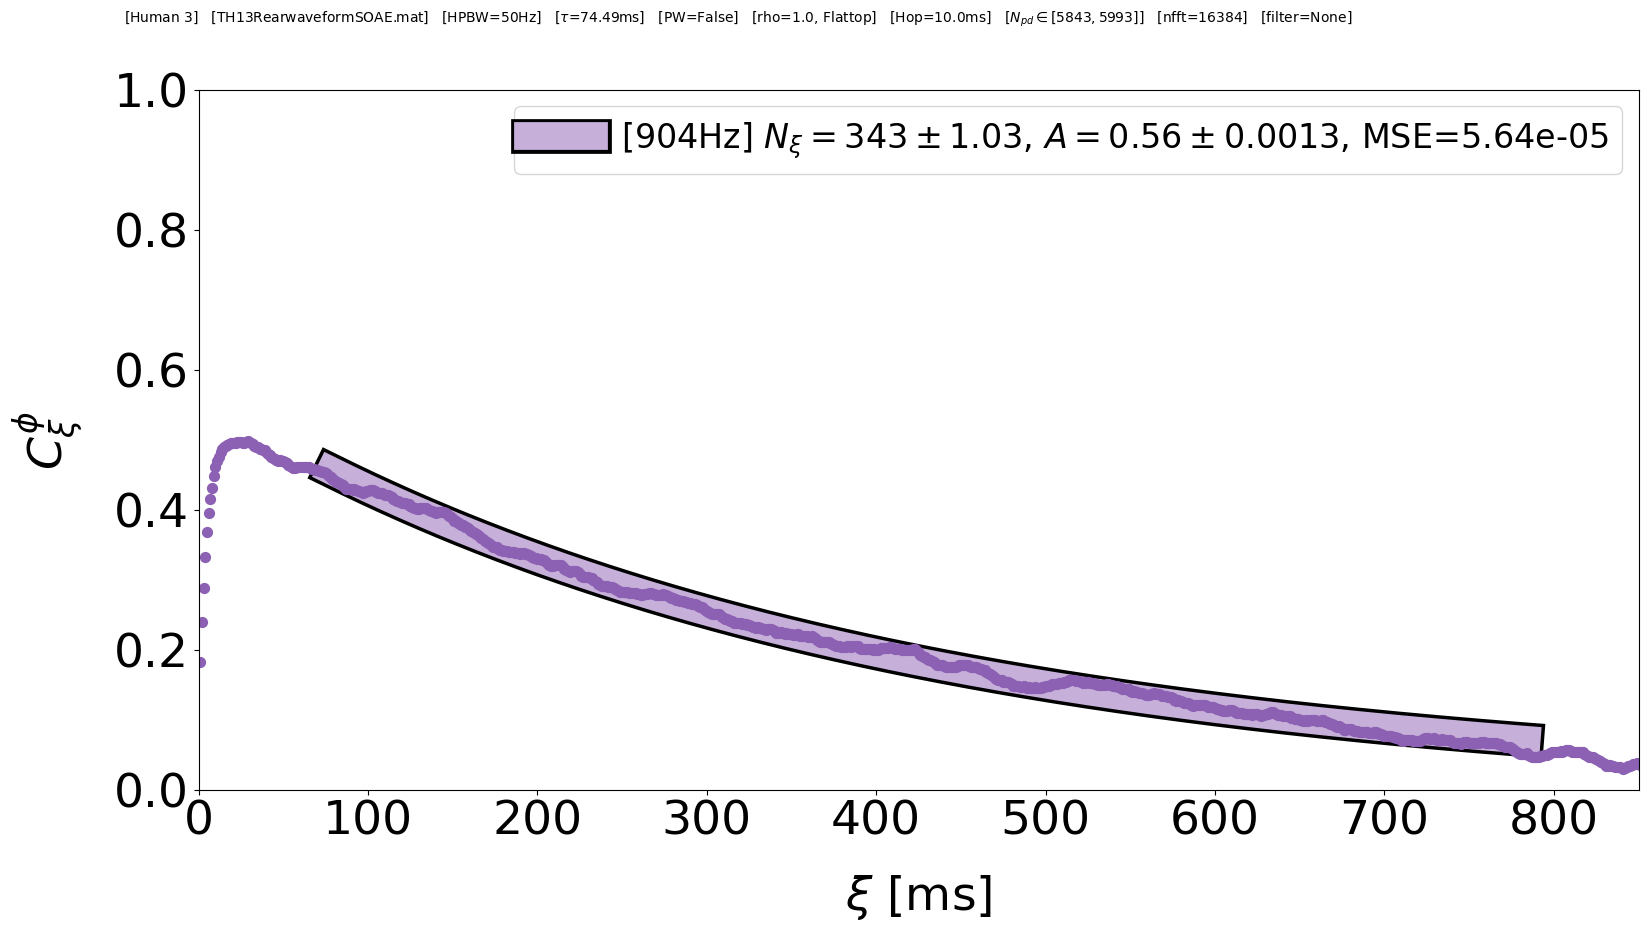

In [53]:
"Human N_xi Fit"

# Choose subject
species = "Human"
wf_idx = 3
# Get waveform
wf, wf_fn, fs, good_peak_freqs, bad_peak_freqs = get_wf(
    species=species,
    wf_idx=wf_idx,
)

# Get/set a few more params
xi_max_s = 1.5
tau = get_precalc_tau_from_bw(bw, fs, win_type, tau_pkl_folder)

# Load Colossogram
cgram_dict = load_calc_colossogram(
    **(
        lcc_kwargs
        | {
            "xi_max_s": xi_max_s,
            "species": species,
            "fs": fs,
            "tau": tau,
            "hop": int(round(hop_s * fs)),
            "wf": wf,
            "wf_idx": wf_idx,
            "wf_fn": wf_fn,
        }
    )
)


# Load everything that wasn't explicitly "saved" in the filename
colossogram = cgram_dict["colossogram"]
fn_id = cgram_dict["fn_id"]
win_meth_str = cgram_dict["win_meth_str"]
method_id = cgram_dict["method_id"]
filter_str = cgram_dict["filter_str"]
N_pd_str = pc.get_N_pd_str(const_N_pd, cgram_dict["N_pd_min"], cgram_dict["N_pd_max"])
f = cgram_dict["f"]
xis_s = cgram_dict["xis_s"]
good_peak_idxs = np.argmin(np.abs(f[:, None] - good_peak_freqs[None, :]), axis=0)
method_id = rf"[$\tau$={(tau/fs)*1000:.2f}ms]   [PW={pw}]   [{win_meth_str}]   [Hop={hop_s*1000:.1f}ms]   [{N_pd_str}]   [nfft={nfft}]"
suptitle = (
    rf"[{species} {wf_idx}]   [{wf_fn}]   [HPBW={bw}Hz]   {method_id}   [{filter_str}]"
)

# Get N_xi_fit
f0 = 904

# Fitting Parameters
A_max = np.inf  # 1 or np.inf
A_const = False  # Fixes the amplitude of the decay at 1

N_xi, N_xi_dict = pc.get_N_xi(
    cgram_dict,
    f0,
    A_max=A_max,
    A_const=A_const,
)



# MAKE PLOT
fig = plt.figure(figsize=(18, 10))
ax = fig.add_axes([0.2, 0.2, 0.8, 0.7])  # [left, bottom, width, height] in figure fraction
pc.plot_N_xi_fit(N_xi_dict, color=human_color, plot_noise_floor=False, s_signal=50, lw_fit=20, lw_stroke=5)


ax.set_xlabel(r"$\xi$ [ms]", labelpad=labelpad, fontsize=fontsize)
ax.set_ylabel(r"$C_\xi^\phi$", labelpad=labelpad, fontsize=fontsize)
ax.set_title("")
ax.legend(fontsize=fontsize-10)

ax.tick_params('both', labelsize=fontsize)

plt.xlim(0, 850)
    
# plt.title(f"Colossogram", fontsize=18)
plt.suptitle(suptitle, fontsize=10)
# plt.tight_layout()
plt.savefig(os.path.join(paper_figures_folder, f'{species} N_xi Fit ({wf_fn.split('.')[0]}).jpg'),dpi=500)

Processing 'paper_analysis\pickles\soae\Tokay 2, PW=False, rho=1.0, Flattop, hop=441, tau=3285, filter=None, xi_max=100ms, nfft=16384, N_pd=max, DM=True, wf_len=60s, wf=tokay_GG3rearSOAEwf (Colossogram).pkl'
Processing 'paper_analysis\pickles\soae\Tokay 2, PW=False, Static Flattop, hop=441, tau=1095, filter=None, xi_max=100ms, nfft=16384, N_pd=max, DM=True, wf_len=60s, wf=tokay_GG3rearSOAEwf (Colossogram).pkl'
Processing 'paper_analysis\pickles\soae\Tokay 2, PW=False, Static Flattop, hop=441, tau=3285, filter=None, xi_max=50ms, nfft=16384, N_pd=max, DM=True, wf_len=60s, wf=tokay_GG3rearSOAEwf (Colossogram).pkl'


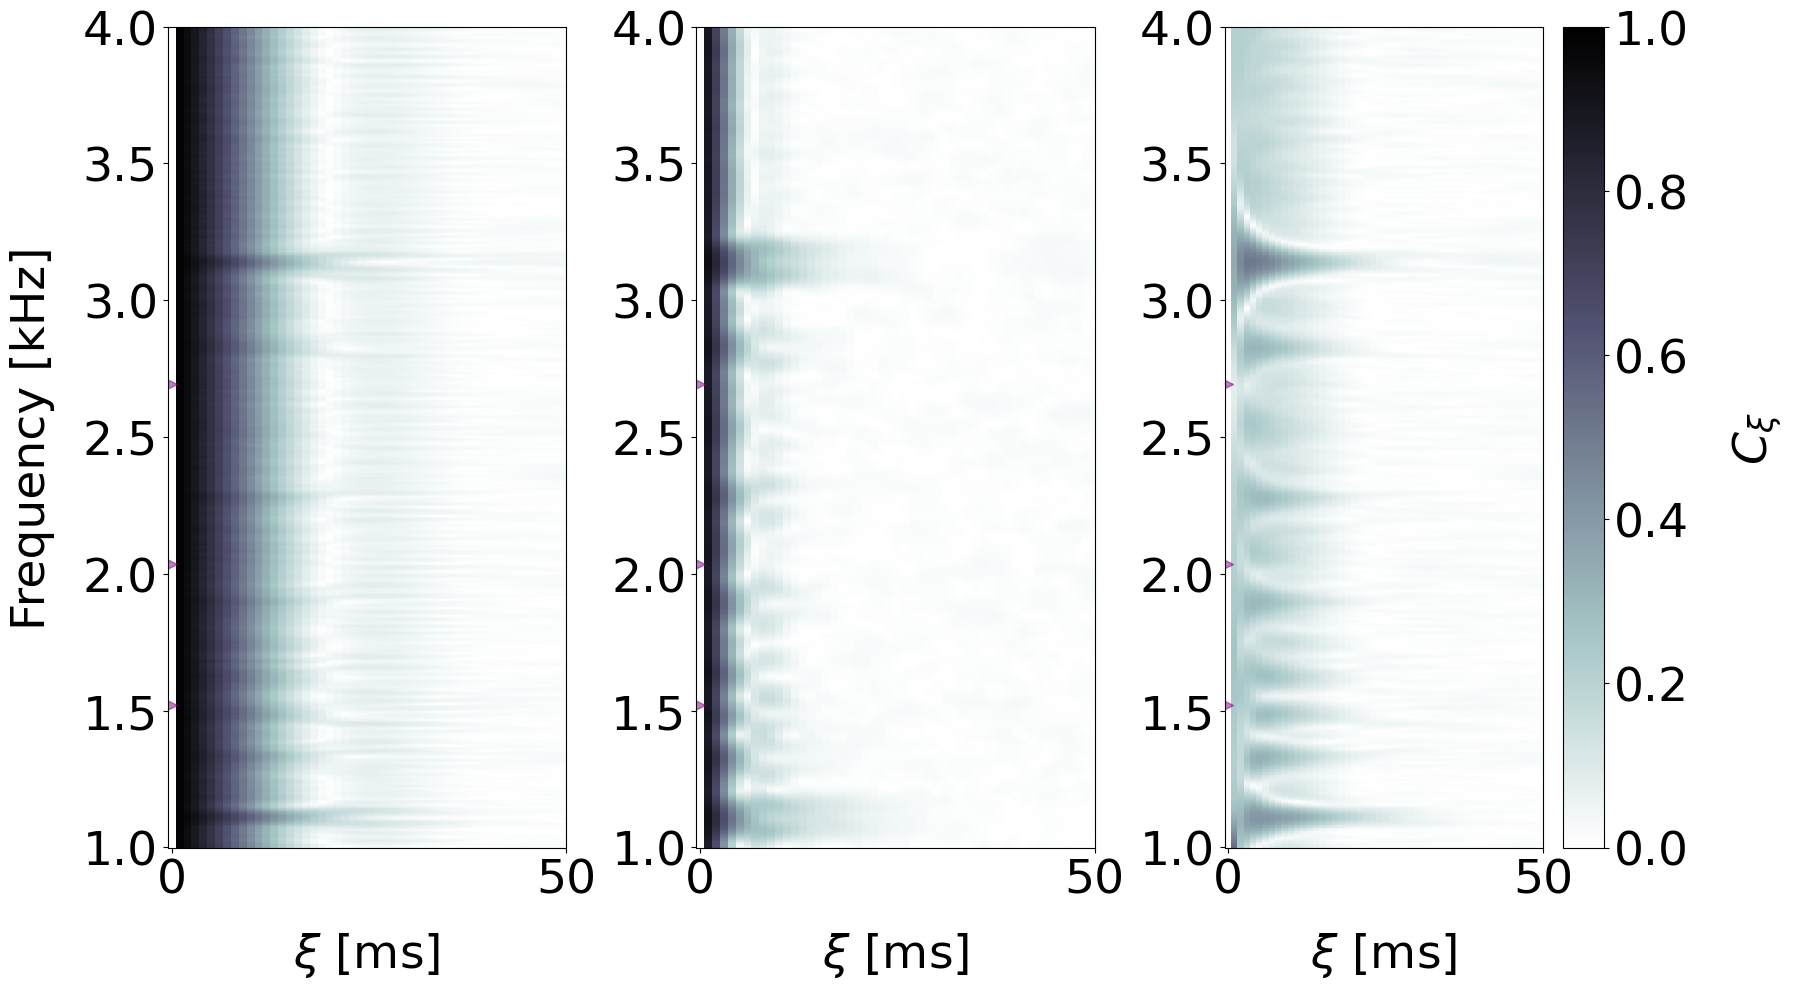

In [54]:
"Static vs Dynamic Colossogram"

# Choose subject
species = "Tokay"
wf_idx = 2

# Get waveform
wf, wf_fn, fs, good_peak_freqs, bad_peak_freqs = get_wf(
    species=species,
    wf_idx=wf_idx,
)

# Get/set a few more params
xi_max_s = 0.05
tau = get_precalc_tau_from_bw(bw, fs, win_type, tau_pkl_folder)
xmax = 50

# INITIALIZE PLOT
plt.figure(figsize=(18, 10))


# Load Colossogram
cgram_dict = load_calc_colossogram(
    **(
        lcc_kwargs
        | {
            "xi_max_s": 0.1,
            "species": species,
            "fs": fs,
            "tau": tau,
            "hop": int(round(hop_s * fs)),
            "wf": wf,
            "wf_idx": wf_idx,
            "wf_fn": wf_fn,
        }
    )
)

# Load everything that wasn't explicitly "saved" in the filename
colossogram = cgram_dict["colossogram"]
xis_s = cgram_dict["xis_s"]
f = cgram_dict["f"]

# MAKE PLOT
plt.subplot(1, 3, 3)
cbar = pc.plot_colossogram(
    xis_s,
    f,
    colossogram,
    cmap="bone_r",
    return_cbar=True
)
# Set Chris' requested fontsizes
ax = plt.gca()


ax.set_xlabel(r"$\xi$ [ms]", labelpad=labelpad, fontsize=fontsize)
ax.set_ylabel("Frequency [kHz]", labelpad=labelpad, fontsize=fontsize)
ax.set_ylabel(None)

ax.tick_params('both', labelsize=fontsize)
cbar.ax.yaxis.label.set_fontsize(fontsize)
cbar.ax.tick_params(labelsize=fontsize)

plt.ylim(1.0, 4.0)
xmin=-0.5
plt.xlim(xmin, xmax)

for f0_idx in good_peak_idxs:
    plt.scatter(
        xmin/2,
        f[f0_idx] / 1000,
        c="purple",
        marker=">",
        label="Peak at " + f"{f[f0_idx]:0f}Hz",
        alpha=0.5,
        s=100
    )
    

"Repeat for static"
lcc_kwargs_static = lcc_kwargs.copy()
lcc_kwargs_static['win_meth'] = {'method':'static', 'win_type':win_type}
bw_static = 150
tau_static = get_precalc_tau_from_bw(bw_static, fs, win_type, tau_pkl_folder)

# Load Colossogram
cgram_dict = load_calc_colossogram(
    **(
        lcc_kwargs_static
        | {
            "xi_max_s": 0.1,
            "species": species,
            "fs": fs,
            "tau": tau_static,
            "hop": int(round(hop_s * fs)),
            "wf": wf,
            "wf_idx": wf_idx,
            "wf_fn": wf_fn,
        }
    )
)

# Load everything that wasn't explicitly "saved" in the filename
colossogram = cgram_dict["colossogram"]
xis_s = cgram_dict["xis_s"]
f = cgram_dict["f"]

# MAKE PLOT
plt.subplot(1, 3, 2)
cbar = pc.plot_colossogram(
    xis_s,
    f,
    colossogram,
    cmap="bone_r",
    return_cbar=True
)
# Set Chris' requested fontsizes
ax = plt.gca()


ax.set_xlabel(r"$\xi$ [ms]", labelpad=labelpad, fontsize=fontsize)
ax.set_ylabel("Frequency [kHz]", labelpad=labelpad, fontsize=fontsize)
ax.set_ylabel(None)

ax.tick_params('both', labelsize=fontsize)
cbar.ax.yaxis.label.set_fontsize(fontsize)
cbar.ax.tick_params(labelsize=fontsize)
cbar.remove()

plt.ylim(1.0, 4.0)
xmin=-0.5
plt.xlim(xmin, xmax)

for f0_idx in good_peak_idxs:
    plt.scatter(
        xmin/2,
        f[f0_idx] / 1000,
        c="purple",
        marker=">",
        label="Peak at " + f"{f[f0_idx]:0f}Hz",
        alpha=0.5,
        s=100
    )


"Repeat for static (50Hz)"
lcc_kwargs_static = lcc_kwargs.copy()
lcc_kwargs_static['win_meth'] = {'method':'static', 'win_type':win_type}
bw_static = 50
tau_static = get_precalc_tau_from_bw(bw_static, fs, win_type, tau_pkl_folder)

# Load Colossogram
cgram_dict = load_calc_colossogram(
    **(
        lcc_kwargs_static
        | {
            "xi_max_s": xi_max_s,
            "species": species,
            "fs": fs,
            "tau": tau_static,
            "hop": int(round(hop_s * fs)),
            "wf": wf,
            "wf_idx": wf_idx,
            "wf_fn": wf_fn,
        }
    )
)

# Load everything that wasn't explicitly "saved" in the filename
colossogram = cgram_dict["colossogram"]
xis_s = cgram_dict["xis_s"]
f = cgram_dict["f"]

# MAKE PLOT
plt.subplot(1, 3, 1)
cbar = pc.plot_colossogram(
    xis_s,
    f,
    colossogram,
    cmap="bone_r",
    return_cbar=True
)
# Set Chris' requested fontsizes
ax = plt.gca()


ax.set_xlabel(r"$\xi$ [ms]", labelpad=labelpad, fontsize=fontsize)
ax.set_ylabel("Frequency [kHz]", labelpad=labelpad, fontsize=fontsize)

ax.tick_params('both', labelsize=fontsize)
cbar.ax.yaxis.label.set_fontsize(fontsize)
cbar.ax.tick_params(labelsize=fontsize)
cbar.remove()

plt.ylim(1.0, 4.0)
xmin=-0.5
plt.xlim(xmin, xmax)

for f0_idx in good_peak_idxs:
    plt.scatter(
        xmin/2,
        f[f0_idx] / 1000,
        c="purple",
        marker=">",
        label="Peak at " + f"{f[f0_idx]:0f}Hz",
        alpha=0.5,
        s=100
    )




plt.tight_layout()

plt.savefig(os.path.join(paper_figures_folder, f'dyn win cgram fig.jpg'),dpi=500)

In [ ]:
"Ruling Out Static Windowing Plot"

# WF pre-processing parameters
filter_meth = None
wf_len_s = 60  # Will crop waveform to this length (in seconds)
scale = True  # Scale the waveform (only actually scales if we know the right scaling constant, which is only Anoles and Humans)

# Coherence Parameters
hop_s = 0.01
win_type = "flattop"
rho = 1.0
pw = False
demean = True

bws = [50, 150, 51]
xi_min_s = 0.001
delta_xi_s = 0.001
nfft = 2**14
const_N_pd = 0


# Start building LCC kwargs dict with constants
lcc_kwargs = {
    "wf_len_s": wf_len_s,
    "pw": pw,
    "xi_min_s": xi_min_s,
    "nfft": nfft,
    "pkl_folder": pkl_folder,
    "demean":demean,
}

# human_idx = 0
# human_f0 = 2665
# human_idx = 3
# human_f0 = 2697
human_idx = 2
human_f0 = 1637

anole_idx = 0
anole_f0 = 4500

plt.figure(figsize=(15, 20))
fontsize2= 15
labelpad2 = 5
row_idx = 0
for bw in bws:
    if bw == 51:
        win_meth = {"method": "rho", "rho": rho, "win_type": win_type}
        bw = 50
        wm_str = "Dynamic"
        
    else:
        win_meth = {"method": "static", "win_type": win_type}
        wm_str = "Static"
    for species, wf_idx, col_idx, f0 in [
        ("Anole", anole_idx, 1, anole_f0),
        ("Human", human_idx, 2, human_f0),
    ]:
        f0s = None
        # title = f"{wm_str}, BW={bw} [{species} {f0}Hz]" if row_idx ==0 else f"{wm_str}, BW={bw}"
        title = f"{wm_str} Window, BW={bw}Hz [{species}]"
        decay_start_limit_xi_s = 0.05 if species == "Human" else 0.02
        plt.subplot(3, 2, col_idx + row_idx)

        # Get wf info
        wf, wf_fn, fs, good_peak_freqs, bad_peak_freqs = get_wf(
            species=species,
            wf_idx=wf_idx,
        )
        hop = int(round(hop_s * fs))
        if wm_str == "Dynamic":
            if species == "Human":
                xi_max_s = 1.5
            else:
                xi_max_s = 0.1
        elif wm_str == "Static":
            if species == "Human":
                xi_max_s = 0.2
            else:
                xi_max_s = 0.05
        # if species == "Human" and wm_str == "Static" and bw == 150:
        #     filter_meth = {
        #         "type": "kaiser",
        #         "cf": 300,
        #         "df": 50,
        #         "rip": 100,
        #     }
        #     xi_max_s = 0.15
        # else:
        #     filter_meth = None
        filter_meth=None
        xmin = 1

        xmax = 50 if species == "Anole" else 200

        # Get cgram
        print(f"BW={bw}Hz")
        tau = get_precalc_tau_from_bw(bw, fs, win_type, tau_pkl_folder)
        cgram_dict = load_calc_colossogram(
            **(
                lcc_kwargs
                | {
                    "xi_max_s": xi_max_s,
                    "species": species,
                    "fs": fs,
                    "tau": tau,
                    "hop": hop,
                    "wf": wf,
                    "wf_idx": wf_idx,
                    "wf_fn": wf_fn,
                    "win_meth": win_meth,
                    "filter_meth": filter_meth,
                    "f0s":f0s
                }
            )
        )
        _, N_xi_dict = pc.get_N_xi(
            cgram_dict, decay_start_limit_xi_s=decay_start_limit_xi_s, f0=f0
        )
        pc.plot_N_xi_fit(N_xi_dict, plot_fit=(wm_str == "Dynamic"), color=human_color if species=='Human' else anole_color)
        plt.xlim(xmin, xmax)
        plt.title(title)
        plt.legend(fontsize=fontsize2/2)
        ax = plt.gca()
        ax.set_xlabel(r"$\xi$ [ms]", labelpad=labelpad2, fontsize=fontsize2)
        ax.set_ylabel(r"$C_\xi^\phi$", labelpad=labelpad2, fontsize=fontsize2)
        ax.tick_params("both", labelsize=fontsize2)
    row_idx += 2
# plt.tight_layout()
plt.savefig(
    os.path.join(paper_figures_folder, f"Ruling out static windowing.jpg"),
    dpi=500,
)